# Chips

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

## Непосредственно, AdaBoost

In [2]:
class AdaBoostClassifier:
    def __init__(self, base_estimator=DecisionTreeClassifier, n_estimators=10):
        self.T = n_estimators
        self.base_estimator = base_estimator
        self.learning_accuracies = []

    def init_weights(self):
        self.w = [1 / self.n_objects for _ in range(self.n_objects)]

    def normalize_weights(self):
        norm = 0
        for i in range(len(self.w)):
            norm += self.w[i]
        for i in range(len(self.w)):
            self.w[i] /= norm

    def fit(self, X, y):
        self.learning_accuracies = []
        self.n_objects = len(X)
        self.init_weights()
        self.H = []
        self.alphas = []
        for t in range(1, self.T + 1):
            h = self.base_estimator(max_depth=1)
            h.fit(X, y, sample_weight=self.w)
            self.H.append(h)
            err = 0
            predicted = h.predict(X)
            for i in range(self.n_objects):
                if y[i] != predicted[i]:
                    I = 1
                else:
                    I = 0
                err += I * self.w[i]
            alpha = 0.5 * np.log((1 - err) / err)
            self.alphas.append(alpha)
            for i in range(self.n_objects):
                self.w[i] = self.w[i] * np.exp(-alpha * y[i] * predicted[i])
            self.normalize_weights()
            self.learning_accuracies.append(accuracy_score(np.sign(self.predict(X)), y))
            
    def predict(self, X):
        res = []
        for i in range(len(X)):
            sum = 0
            for t in range(self.T):
                if t >= len(self.H):
                    break
                sum += self.alphas[t] * self.H[t].predict([X[i]])[0]
            res.append(sum)
        return res

## Считываем датасет

In [3]:
ds = pd.read_csv('data/chips.csv')
ds = ds.sample(frac=1)

positive_ds = ds[ds['class'] == 'P']
negative_ds = ds[ds['class'] == 'N']

y_train = ds['class'].replace({'P': 1, 'N': -1}).to_numpy()
ds = ds.drop(columns=['class'])
X_train = ds.to_numpy()

## Функция для графиков

In [4]:
def draw_graphic(X, y, positive_ds, negative_ds, n_estimators):
    clf = AdaBoostClassifier(DecisionTreeClassifier, n_estimators=n_estimators)
    clf.fit(X, y)
    accuracy = accuracy_score(np.sign(clf.predict(X_train)), y_train)

    fig, ax = plt.subplots()
    ax.scatter(positive_ds['x'], positive_ds['y'], c='#0000ff')
    ax.scatter(negative_ds['x'], negative_ds['y'], c='#ff0000')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    Z = clf.predict(xy)
    Z = np.array(Z).reshape(XX.shape)

    ax.contourf(XX, YY, Z, levels=[-100, 0, 100], alpha=0.2, colors=['#ff0000', '#0000ff'])
    
    ax.contour(XX, YY, Z, levels=[0], alpha=1, linestyles=['-'], colors='k')
    
    plt.xlabel('x')
    plt.ylabel('y')
    title = "n_estimators=" + str(n_estimators)
    title += "    Accuracy = " + str(accuracy)
    plt.title(title)
    plt.show()

In [5]:
n_estimators_arr = [1, 2, 3, 4,5, 8, 13, 21, 34, 55, 100]

## Рисуем графики

Можно заметить, что на некоторых соседних итерациях acccuracy одинаковое, это происходит из-за особенности алгоритма SAMME (Алгоритм SAMME.R, который по дефолту используется в AdaBoostClassifier из ski-kit, обычно сходится быстрее и быстрее миниизирует ошибку err)

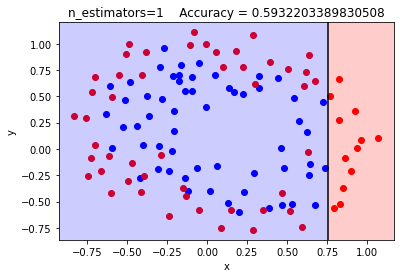

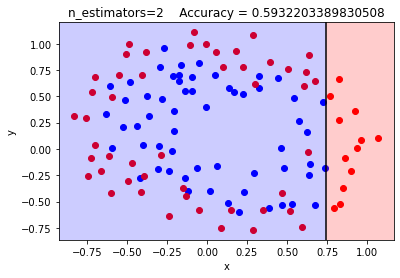

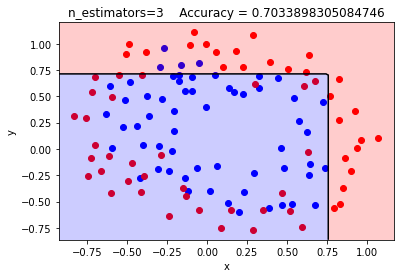

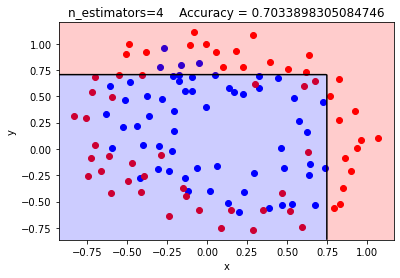

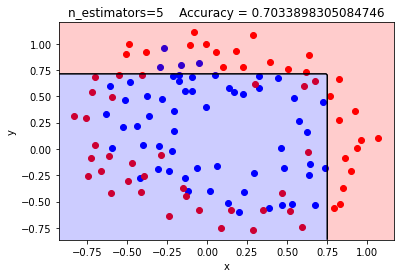

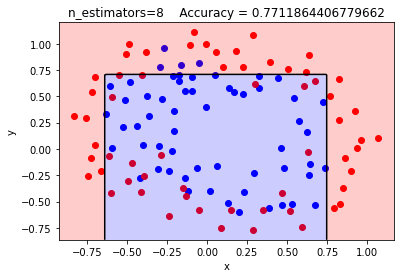

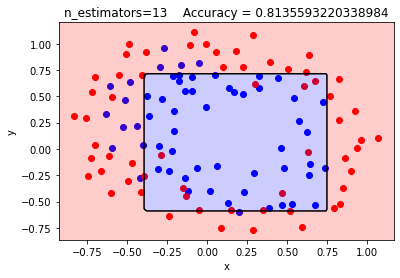

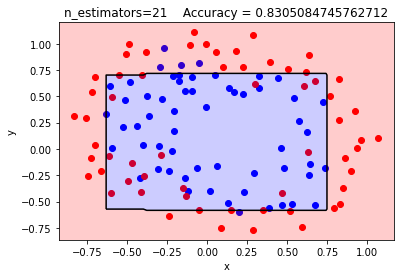

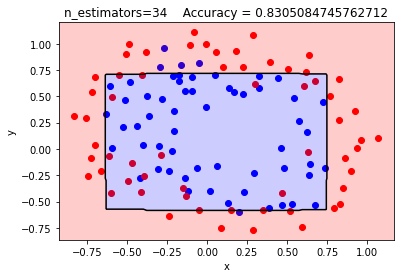

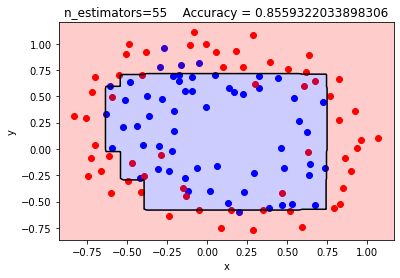

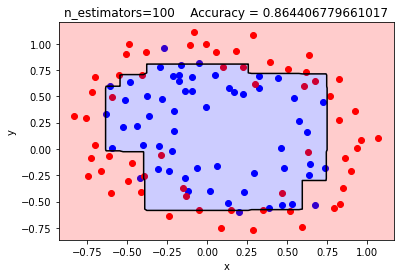

In [6]:
for n_est in n_estimators_arr:
    draw_graphic(X_train, y_train, positive_ds, negative_ds, n_est)

## График точности

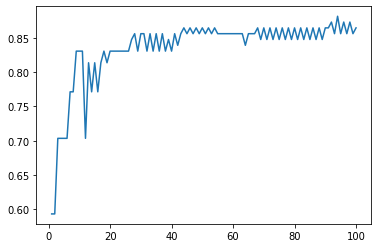

In [7]:
accs = []
iters = []
clf = AdaBoostClassifier(DecisionTreeClassifier, n_estimators=100)
clf.fit(X_train, y_train)
accs = clf.learning_accuracies
iters = [i for i in range(1,101)]

plt.plot(iters, accs)

# Geyser

In [8]:
ds = pd.read_csv('data/geyser.csv')
ds = ds.sample(frac=1)

positive_ds = ds[ds['class'] == 'P']
negative_ds = ds[ds['class'] == 'N']

y_train = ds['class'].replace({'P': 1, 'N': -1}).to_numpy()
ds = ds.drop(columns=['class'])
X_train = ds.to_numpy()

## Рисуем графики

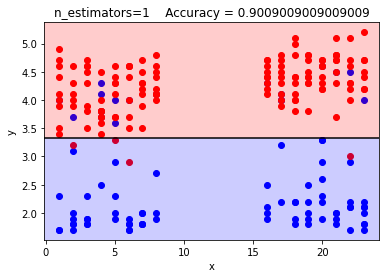

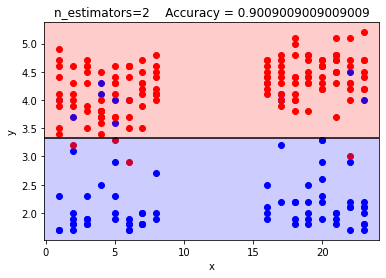

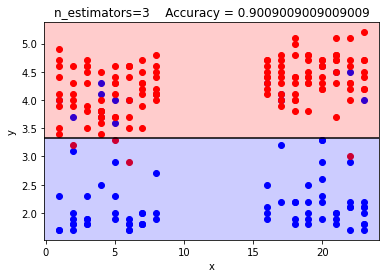

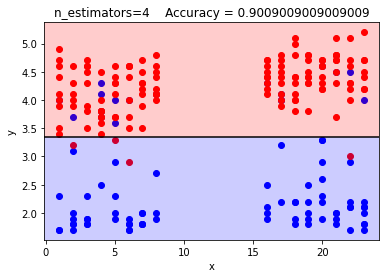

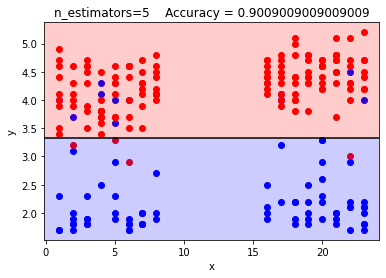

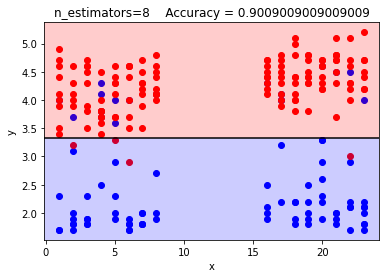

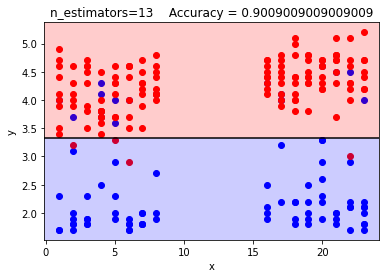

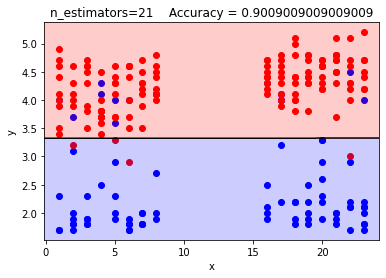

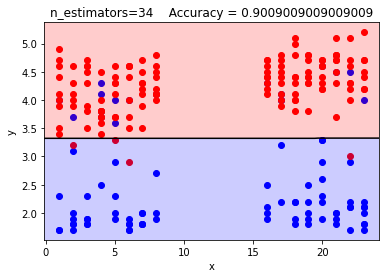

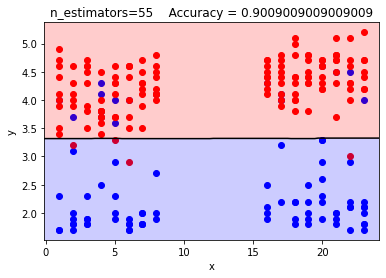

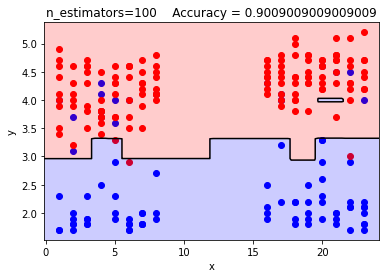

In [9]:
for n_est in n_estimators_arr:
    draw_graphic(X_train, y_train, positive_ds, negative_ds, n_est)

## График точности

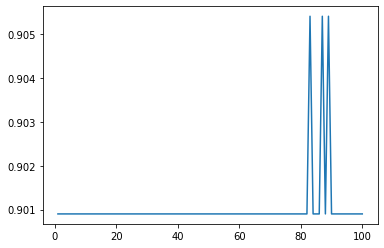

In [10]:
accs = []
iters = []
clf = AdaBoostClassifier(DecisionTreeClassifier, n_estimators=100)
clf.fit(X_train, y_train)
accs = clf.learning_accuracies
iters = [i for i in range(1,101)]

plt.plot(iters, accs)
plt.show()